# Importing required libraries

In [95]:
# Install the required libraries
!pip install prophet

In [96]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

# Importing our datasets

In [97]:
home_ownership_rate = pd.read_csv("Home Ownership Rate (Hamilton, OH) - Home Ownership Rate.csv")
us_census = pd.read_csv("US Census (Hamilton, OH) - Sheet1.csv")
home_value_forecast = pd.read_csv("Home Value Forecast - Sheet1.csv")
metro_sales_count = pd.read_csv("Metro Sales Count - Sheet1.csv")
new_construction_sales = pd.read_csv("New Construction Sales - Sheet1.csv")
zestimate = pd.read_csv("Zillow Housing Estimate Index - Sheet1.csv")

In [98]:
display(zestimate.head())


,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
0,394466,28,"Cincinnati, OH",msa,OH,123285.59080,123248.6175,123190.11390,123465.08810,123998.75980,...,256429.8895,257186.0028,258907.0016,261391.1562,263944.2553,266223.3256,267886.2660,268921.0643,269405.3712,269668.9344
1,394492,32,"Columbus, OH",msa,OH,122802.19670,122909.1501,123081.82620,123429.69540,123850.70580,...,284776.9682,285236.2615,286804.2594,288978.0312,291477.0123,293844.5102,295975.9036,297656.6676,298865.4308,299588.3884
2,394475,35,"Cleveland, OH",msa,OH,115713.93960,115883.6149,116056.98890,116418.73980,116976.62730,...,202291.0216,202583.4009,203810.8053,205405.5919,207243.7700,209038.5210,210793.6855,212232.2111,213380.3142,214136.1425
3,394304,83,"Akron, OH",msa,OH,106289.14790,106456.4836,106577.02750,106875.41180,107149.62400,...,194782.3361,195229.4814,196585.1946,198324.0854,200149.8978,201907.0226,203367.1560,204596.9838,205441.5261,206093.6075
4,395160,93,"Toledo, OH",msa,OH,83501.85695,83582.9768,83699.29069,84039.18756,84556.47498,...,165502.3824,165836.6763,167074.6010,168790.1211,170897.0878,173017.8861,174626.7266,175847.7469,176854.7346,177813.3466


# Getting some general information on our dataset

In [99]:
zestimate.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
0,394466,28,"Cincinnati, OH",msa,OH,123285.59080,123248.6175,123190.11390,123465.08810,123998.75980,...,256429.8895,257186.0028,258907.0016,261391.1562,263944.2553,266223.3256,267886.2660,268921.0643,269405.3712,269668.9344
1,394492,32,"Columbus, OH",msa,OH,122802.19670,122909.1501,123081.82620,123429.69540,123850.70580,...,284776.9682,285236.2615,286804.2594,288978.0312,291477.0123,293844.5102,295975.9036,297656.6676,298865.4308,299588.3884
2,394475,35,"Cleveland, OH",msa,OH,115713.93960,115883.6149,116056.98890,116418.73980,116976.62730,...,202291.0216,202583.4009,203810.8053,205405.5919,207243.7700,209038.5210,210793.6855,212232.2111,213380.3142,214136.1425
3,394304,83,"Akron, OH",msa,OH,106289.14790,106456.4836,106577.02750,106875.41180,107149.62400,...,194782.3361,195229.4814,196585.1946,198324.0854,200149.8978,201907.0226,203367.1560,204596.9838,205441.5261,206093.6075
4,395160,93,"Toledo, OH",msa,OH,83501.85695,83582.9768,83699.29069,84039.18756,84556.47498,...,165502.3824,165836.6763,167074.6010,168790.1211,170897.0878,173017.8861,174626.7266,175847.7469,176854.7346,177813.3466


In [100]:
zestimate.describe

<bound method NDFrame.describe of     RegionID  SizeRank                  RegionName RegionType StateName  \
0     394466        28              Cincinnati, OH        msa        OH   
1     394492        32                Columbus, OH        msa        OH   
2     394475        35               Cleveland, OH        msa        OH   
3     394304        83                   Akron, OH        msa        OH   
4     395160        93                  Toledo, OH        msa        OH   
5     395245       106              Youngstown, OH        msa        OH   
6     394439       137                  Canton, OH        msa        OH   
7     394697       151              Huntington, WV        msa        OH   
8     395221       309                Wheeling, WV        msa        OH   
9     395117       316             Springfield, OH        msa        OH   
10    394824       337               Mansfield, OH        msa        OH   
11    395217       353                 Weirton, WV        msa     

In [101]:
zestimate.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '1/31/2000', '2/29/2000', '3/31/2000', '4/30/2000', '5/31/2000',
       ...
       '2/28/2023', '3/31/2023', '4/30/2023', '5/31/2023', '6/30/2023',
       '7/31/2023', '8/31/2023', '9/30/2023', '10/31/2023', '11/30/2023'],
      dtype='object', length=292)

In [102]:
import pandas as pd

zestimate = pd.read_csv('./Zillow Housing Estimate Index - Sheet1.csv')  # replace 'your_file.csv' with your actual file

# Filter columns from 2023
cols_2023 = [col for col in zestimate.columns if '2023' in col]
cols = ['RegionName'] + cols_2023

# Create a new DataFrame with only the filtered columns
df_filtered = zestimate[cols]

# Calculate the mean for each city in 2023
df_filtered['Mean_2023'] = df_filtered[cols_2023].mean(axis=1)

# Print the mean values
print(df_filtered[['RegionName', 'Mean_2023']])



                    RegionName      Mean_2023
0               Cincinnati, OH  263305.138409
1                 Columbus, OH  291657.197700
2                Cleveland, OH  207579.830264
3                    Akron, OH  200133.371536
4                   Toledo, OH  171100.921282
5               Youngstown, OH  143095.933345
6                   Canton, OH  184023.719445
7               Huntington, WV  138880.634355
8                 Wheeling, WV  132205.102573
9              Springfield, OH  166914.659091
10               Mansfield, OH  161986.275973
11                 Weirton, WV  119279.330036
12                    Lima, OH  161689.499136
13                   Salem, OH  140488.626800
14               Ashtabula, OH  157913.766209
15        New Philadelphia, OH  181300.551155
16              Zanesville, OH  171604.079818
17             Chillicothe, OH  184326.868127
18                Sandusky, OH  200260.119964
19                 Findlay, OH  210528.674400
20              Portsmouth, OH  11

C:\Users\bmsto\AppData\Local\Temp\ipykernel_25944\3010337080.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Mean_2023'] = df_filtered[cols_2023].mean(axis=1)


# Plotting each city to visualize trajectory

In [103]:
import pandas as pd

zestimate_mean = pd.read_csv('./Zillow Housing Estimate Index - Sheet1.csv') 

# Filter columns from 2023
cols_2023 = [col for col in zestimate.columns if '2023' in col]
cols = ['RegionName'] + cols_2023

# Create a new DataFrame with only the filtered columns
df_filtered = zestimate[cols]

# Calculate the mean for each city in 2023
df_filtered['Mean_2023'] = df_filtered[cols_2023].mean(axis=1)

# Print the mean values
print(df_filtered[['RegionName', 'Mean_2023']])


                    RegionName      Mean_2023
0               Cincinnati, OH  263305.138409
1                 Columbus, OH  291657.197700
2                Cleveland, OH  207579.830264
3                    Akron, OH  200133.371536
4                   Toledo, OH  171100.921282
5               Youngstown, OH  143095.933345
6                   Canton, OH  184023.719445
7               Huntington, WV  138880.634355
8                 Wheeling, WV  132205.102573
9              Springfield, OH  166914.659091
10               Mansfield, OH  161986.275973
11                 Weirton, WV  119279.330036
12                    Lima, OH  161689.499136
13                   Salem, OH  140488.626800
14               Ashtabula, OH  157913.766209
15        New Philadelphia, OH  181300.551155
16              Zanesville, OH  171604.079818
17             Chillicothe, OH  184326.868127
18                Sandusky, OH  200260.119964
19                 Findlay, OH  210528.674400
20              Portsmouth, OH  11

C:\Users\bmsto\AppData\Local\Temp\ipykernel_25944\172936049.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Mean_2023'] = df_filtered[cols_2023].mean(axis=1)


# Getting the mean of each city in dataframe format

In [104]:
# Create a new DataFrame with the region names and their mean values
mean_df = df_filtered[['RegionName', 'Mean_2023']].copy()


In [105]:
mean_df.head()

,RegionName,Mean_2023
0,"Cincinnati, OH",263305.138409
1,"Columbus, OH",291657.197700
2,"Cleveland, OH",207579.830264
3,"Akron, OH",200133.371536
4,"Toledo, OH",171100.921282


# Plotting the mean for each city

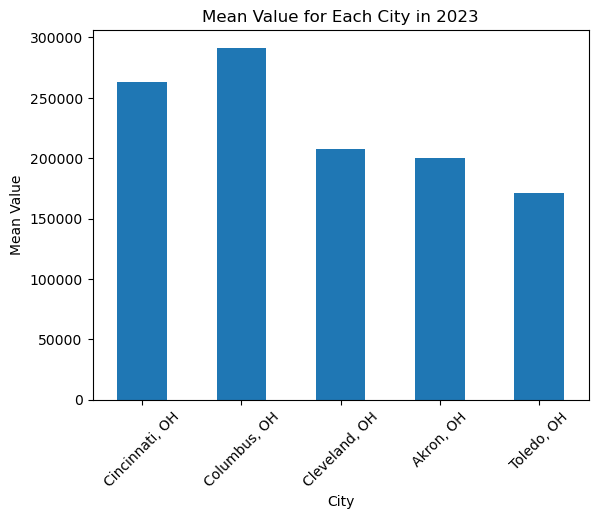

In [106]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming mean_df is your DataFrame
mean_df = pd.DataFrame({
    'RegionName': ['Cincinnati, OH', 'Columbus, OH', 'Cleveland, OH', 'Akron, OH', 'Toledo, OH'],
    'Mean_2023': [263305.138409, 291657.197700, 207579.830264, 200133.371536, 171100.921282]
})

mean_df.plot(kind='bar', x='RegionName', y='Mean_2023', legend=False)
plt.xlabel('City')
plt.ylabel('Mean Value')
plt.title('Mean Value for Each City in 2023')
plt.xticks(rotation=45)
plt.show()


# Dataframe of the mean zestimate for each city

In [107]:
zestimate.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
0,394466,28,"Cincinnati, OH",msa,OH,123285.59080,123248.6175,123190.11390,123465.08810,123998.75980,...,256429.8895,257186.0028,258907.0016,261391.1562,263944.2553,266223.3256,267886.2660,268921.0643,269405.3712,269668.9344
1,394492,32,"Columbus, OH",msa,OH,122802.19670,122909.1501,123081.82620,123429.69540,123850.70580,...,284776.9682,285236.2615,286804.2594,288978.0312,291477.0123,293844.5102,295975.9036,297656.6676,298865.4308,299588.3884
2,394475,35,"Cleveland, OH",msa,OH,115713.93960,115883.6149,116056.98890,116418.73980,116976.62730,...,202291.0216,202583.4009,203810.8053,205405.5919,207243.7700,209038.5210,210793.6855,212232.2111,213380.3142,214136.1425
3,394304,83,"Akron, OH",msa,OH,106289.14790,106456.4836,106577.02750,106875.41180,107149.62400,...,194782.3361,195229.4814,196585.1946,198324.0854,200149.8978,201907.0226,203367.1560,204596.9838,205441.5261,206093.6075
4,395160,93,"Toledo, OH",msa,OH,83501.85695,83582.9768,83699.29069,84039.18756,84556.47498,...,165502.3824,165836.6763,167074.6010,168790.1211,170897.0878,173017.8861,174626.7266,175847.7469,176854.7346,177813.3466


# Plotting housing zestimates in 2000 vs 2023 for each city in Ohio

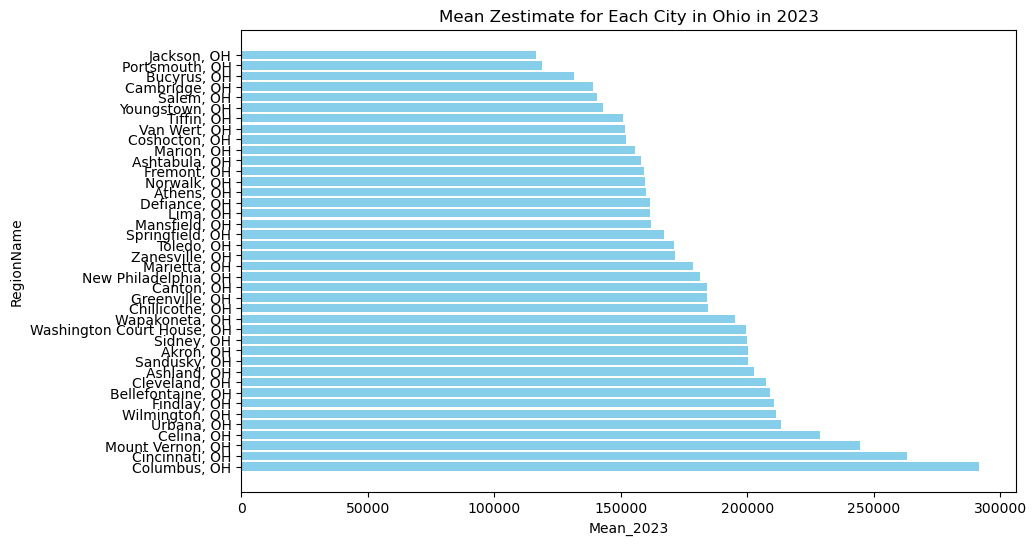

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'RegionName': ['Cincinnati, OH', 'Columbus, OH', 'Cleveland, OH', 'Akron, OH', 'Toledo, OH', 'Youngstown, OH', 'Canton, OH', 'Huntington, WV', 'Wheeling, WV', 'Springfield, OH', 'Mansfield, OH', 'Weirton, WV', 'Lima, OH', 'Salem, OH', 'Ashtabula, OH', 'New Philadelphia, OH', 'Zanesville, OH', 'Chillicothe, OH', 'Sandusky, OH', 'Findlay, OH', 'Portsmouth, OH', 'Marion, OH', 'Athens, OH', 'Mount Vernon, OH', 'Marietta, OH', 'Fremont, OH', 'Norwalk, OH', 'Tiffin, OH', 'Point Pleasant, WV', 'Ashland, OH', 'Greenville, OH', 'Sidney, OH', 'Wapakoneta, OH', 'Bellefontaine, OH', 'Celina, OH', 'Wilmington, OH', 'Bucyrus, OH', 'Urbana, OH', 'Cambridge, OH', 'Defiance, OH', 'Coshocton, OH', 'Jackson, OH', 'Washington Court House, OH', 'Van Wert, OH'],
    'Mean_2023': [263305.138409, 291657.197700, 207579.830264, 200133.371536, 171100.921282, 143095.933345, 184023.719445, 138880.634355, 132205.102573, 166914.659091, 161986.275973, 119279.330036, 161689.499136, 140488.626800, 157913.766209, 181300.551155, 171604.079818, 184326.868127, 200260.119964, 210528.674400, 118903.271273, 155798.867227, 160043.236936, 244497.605464, 178670.099791, 159093.650200, 159567.207145, 150751.749782, 136432.576118, 202678.053736, 184258.144655, 200018.978464, 195268.056327, 209025.609945, 228853.665545, 211180.788164, 131497.549764, 213414.454718, 139114.623236, 161362.076936, 151923.137945, 116407.309609, 199466.818136, 151535.763018]
}

# Create DataFrame
mean_df = pd.DataFrame(data)

# Filter DataFrame to only include cities in Ohio
mean_df = mean_df[mean_df['RegionName'].str.contains(', OH')]

# Sort values for a more more sleek visualization 
mean_df = mean_df.sort_values('Mean_2023')

# Plot
plt.figure(figsize=(10,6))
plt.barh(mean_df['RegionName'], mean_df['Mean_2023'], color='skyblue')
plt.xlabel('Mean_2023')
plt.ylabel('RegionName')
plt.title('Mean Zestimate for Each City in Ohio in 2023')
plt.gca().invert_yaxis()
plt.show()


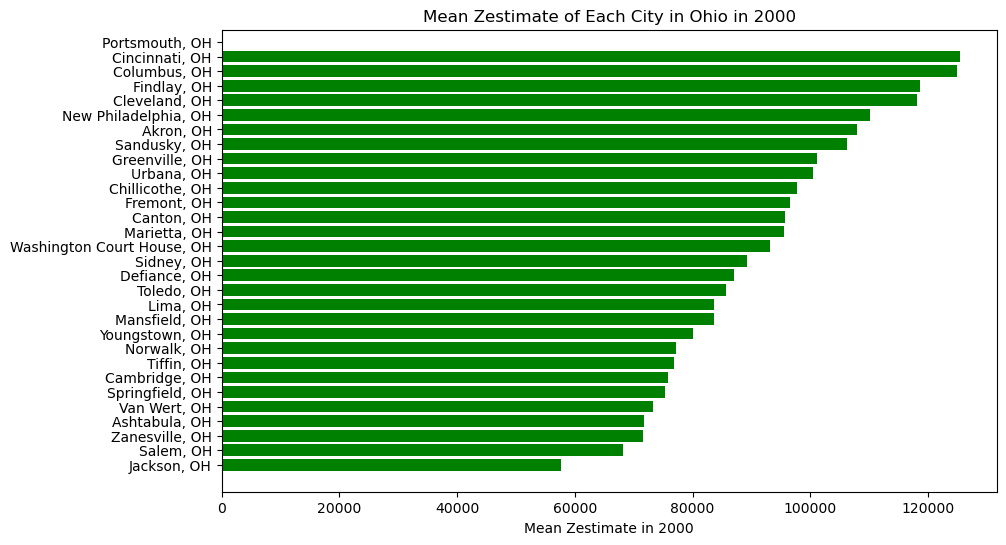

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

df_2000 = zestimate.loc[:, zestimate.columns.str.contains('2000')]  # Filter columns for the year 2000

# Calculate mean Zestimate for each city in 2000
mean_zestimate_2000 = df_2000.mean(axis=1)

# Create a new DataFrame for plotting
plot_df = pd.DataFrame({
    'RegionName': zestimate['RegionName'],
    'MeanZestimate2000': mean_zestimate_2000
})

# Filter DataFrame to only include cities in Ohio
plot_df = plot_df[plot_df['RegionName'].str.contains(', OH')]

# Sort values for better visualization
plot_df = plot_df.sort_values('MeanZestimate2000')

# Plot
plt.figure(figsize=(10, 6))
plt.barh(plot_df['RegionName'], plot_df['MeanZestimate2000'], color='green')
plt.xlabel('Mean Zestimate in 2000')
plt.title('Mean Zestimate of Each City in Ohio in 2000')
plt.show()



# Comaring the average price of a home in Ohio 2000 vs. the average price of a home in Ohio in 2023

In [110]:
df_2000.head()

,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,6/30/2000,7/31/2000,8/31/2000,9/30/2000,10/31/2000,11/30/2000,12/31/2000
0,123285.59080,123248.6175,123190.11390,123465.08810,123998.75980,124864.38710,125550.3587,126231.26830,126819.39680,127415.56320,127906.59990,128342.13420
1,122802.19670,122909.1501,123081.82620,123429.69540,123850.70580,124300.54740,124820.5004,125436.13670,126062.50100,126651.15490,127179.44620,127647.74630
2,115713.93960,115883.6149,116056.98890,116418.73980,116976.62730,117631.19990,118350.4137,118928.72750,119477.84390,119975.47050,120474.06060,120984.18600
3,106289.14790,106456.4836,106577.02750,106875.41180,107149.62400,107518.09530,107910.4234,108354.61380,108823.13580,109243.51460,109698.49100,110110.85740
4,83501.85695,83582.9768,83699.29069,84039.18756,84556.47498,85203.78028,85814.4037,86429.83188,87072.96271,87726.03159,88377.10873,88922.49284


In [111]:
mean_df.head()

,RegionName,Mean_2023
41,"Jackson, OH",116407.309609
20,"Portsmouth, OH",118903.271273
36,"Bucyrus, OH",131497.549764
38,"Cambridge, OH",139114.623236
13,"Salem, OH",140488.626800


# Getting the mean values of each year

In [112]:
avg_home_2000 = df_2000.mean().mean()

In [113]:
avg_home_2023 = mean_df.mean().mean()

C:\Users\bmsto\AppData\Local\Temp\ipykernel_25944\4086993270.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_home_2023 = mean_df.mean().mean()


In [114]:
avg_home_2000

89036.87816804688

In [115]:
avg_home_2023

180530.99876675

# Visualization

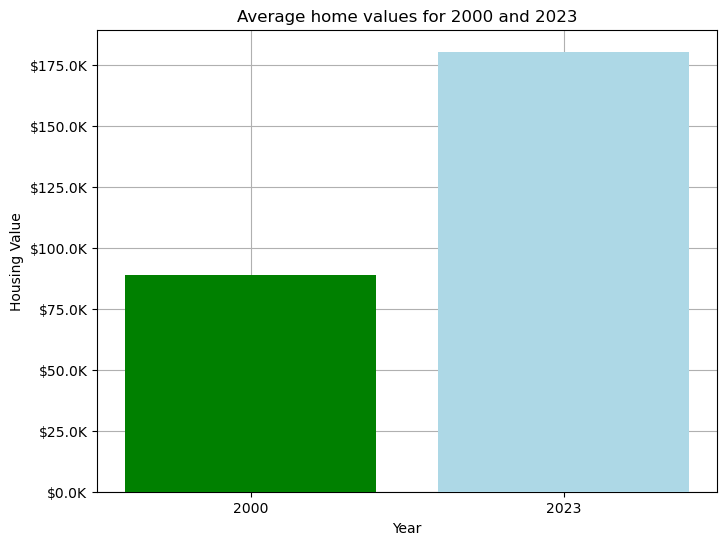

In [116]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

avg_home_2000 = 89036.87  
avg_home_2023 = 180530.99  

# Create a list of years and a list of corresponding mean values
years = ['2000', '2023']
means = [avg_home_2000, avg_home_2023]

# Define a function to format y-axis values
def thousands(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fK' % (x * 1e-3)

formatter = FuncFormatter(thousands)

fig, ax = plt.subplots(figsize=(8, 6))
ax.yaxis.set_major_formatter(formatter)

# Specify the color of each bar
colors = ['green', 'lightblue']
plt.bar(years, means, color=colors, zorder=3)

plt.title('Average home values for 2000 and 2023')
plt.xlabel('Year')
plt.ylabel('Housing Value')
plt.grid(zorder=0)

plt.show()
